# Spectrum Adapted EM algorithmによるスペクトルデータフィット
このノートは、pythonコードであるEMPeaksの利用法に関するチュートリアルです。このパッケージのversion 2.1では、
スペクトルデータに対して種々のバックグラウンドモデル（UniformModel, LinearModel, RampModel）を組み込みバックグラウンド処理とピークフィッティングを同時に実施することができるようになりました。
 
フィッティングにはスペクトル解析用EMアルゴリズム[Sci. Tech. Adv. Mater. 20, 733-735 (2019)]を用います。
version2.0 では、混合ガウス分布に加えて混合ローレンツ分布, 混合擬フォークト分布, 混合Doniach-Sunijic分布に対応[STAM-M 1, 45-55 (2021).]しました。
version2.1 では、バックグラウンド処理に対応[投稿中]しました。

通常のEMアルゴリズムをこの問題に適用する場合、
データはn番目のイベントでの観測エネルギー$E_n$に対する集合$E_{\rm 1D}=\{E_n\}_{n=1}^{N}$を用いますが、
スペクトル解析用では$E_{\rm 1D}$をヒストグラム形式にしたデータ
$E_{\rm 2D} = \{E^{\rm bin}_n, w_n\}_{n=1}^{N_{\rm bin}}$を用います。
ただし、$E_n^{\rm bin}$はチャネル$n$のエネルギー値, $w_n$はチャネル$n$の重み, $N_{\rm bin}$はチャネル数です。

混合モデルの成分数Kはデフォルトでは２に設定されていますが、任意の正の整数に設定することができます。
成分数の最適化は周辺尤度を活用した方法や情報量基準を用いたものが考えられますが、現時点では実装されていませんのでご注意ください。

## チュートリアルの内容
0. パッケージのインストール
1. UniformModel によるバックグラウンド処理
2. LinearModel によるバックグラウンド処理
3. RampModel によるバックグラウンド処理

## 0. パッケージのインストールとパス設定
本パッケージは、PyPIにアップロードされいるため、`pip`コマンドでシステムに導入することができます。

`$pip install EMPeaks`

もしインストールがうまくいかない場合、もしくは直接モジュールにパスを通したい場合には、以下の手順をふんでください。
   1. 配布パッケージの中にあるEMPeaksフォルダをモジュール置き場に移してください。
   2. モジュール置き場のフルパスを記録してください。<br>
     （参照：mac: https://aprico-media.com/posts/1578/ ,windows: https://windows-podcast.com/sundayprogrammer/archives/80 ）
   3. jupyter notebookで以下のセルを実行してください（setup.pyを使った場合には不要です。）
      ``` python
         import sys
         sys.path.append("フルパス")
      ```
Windowsの場合、パス区切りがバックスラッシュ"\\"で表示されます。バックスラッシュはエスケープされてしまうため、全てスラッシュ"/"で置き換えてください。これでも問題なく読み込みます。

これで本パッケージを使用する準備が整いました。

## テスト1. Uniform Modelによるバックグラウンド処理

Sum of "pi" must be unity. Then values are normalized as  [0.14285714 0.14285714 0.14285714 0.57142857]


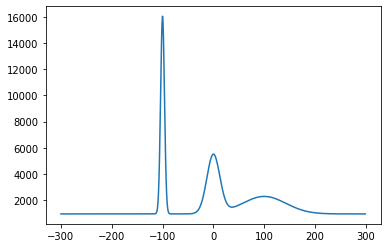

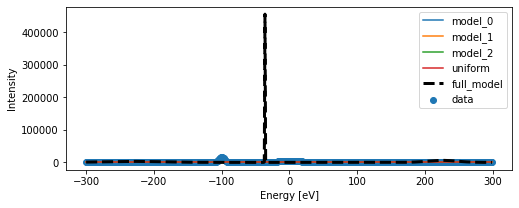

* Starting Trial #   0
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 492, elapsed time  0.58 s
   LogLikelihood:     -6.31210419e+06
        residual:      9.99215481e-09
<< Optimizing normalization factor by using least square method. >>
init 999047.3973481616
   non-linear least-square optimization is successfully finished.
            RMSE:      1.616920e+03
    Elapsed time:      3.348112e-03 s

* Starting Trial #   1
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 144, elapsed time  0.16 s
   LogLikelihood:     -6.31261313e+06
        residual:      9.96556890e-09
<< Optimizing normalization factor by using least square method. >>
init 999047.3973481616
   non-linear least-square optimization is successfully finished.
            RMSE:      1.617707e+03
    Elapsed time:      3.288984e-03 s

* Starting Trial #   2
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter.  70, elapsed time  0.08 s


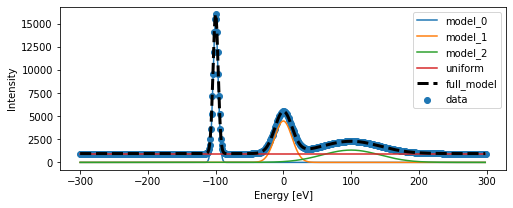

In [3]:
%matplotlib inline
from EMPeaks import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
#フィットするためのデータを生成します
gmm_data = GaussianMixture.GaussianMixtureModel(K=3, background="uniform")
param = {"mu":[-100, 0, 100], "pi":[0.1,0.1,0.1,0.4]}
gmm_data.set_param(**param)
#gmm_data.model[0].mu =-100
#gmm_data.model[1].mu = 150
#gmm_data.model[2].mu = 0

#データと初期パラメータのモデルをプロットします
x = np.arange(-300, 300)
N = 1.0e+6
y = N * gmm_data.predict(x) #+ np.random.poisson(10000, len(x))
plt.plot(x,y)
gmm = GaussianMixture.GaussianMixtureModel(K=3, background="uniform")
gmm.N_tot = sum(y)
gmm.plot(x,y)

#5回の初期パラメータサンプリングのあとに得られた最適なモデルをプロットします。
gmm.sampling(x,y,trial=5, r_eps=1e-8)
#lmm.fit(x, y, r_eps=1e-10)
gmm.plot(x,y)

## テスト2. Linear Modelによるバックグラウンド処理
Linear Modelによるバックグラウンド処理は、一様分布と半三角分布の和でバックグランドを近似します。そのため、ベースラインと線形な単調増加を取り除くことができます。混合率piのうち、最後の数値がバックグラウンドの成分に対応します。

Sum of "pi" must be unity. Then values are normalized as  [0.13333333 0.06666667 0.26666667 0.53333333]


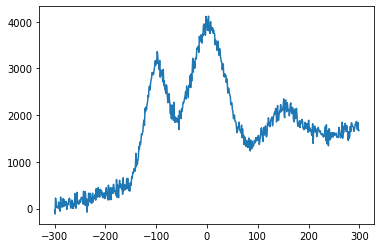

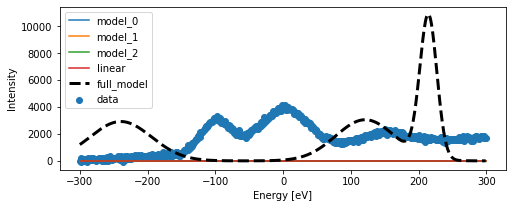

* Starting Trial #   0
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 140, elapsed time  0.13 s
   LogLikelihood:     -6.16259949e+06
        residual:      9.82551917e-09
<< Optimizing normalization factor by using least square method. >>
init 998023.4278353584
   non-linear least-square optimization is successfully finished.
            RMSE:      9.846015e+01
    Elapsed time:      2.883196e-03 s

* Starting Trial #   1
<< Start fitting via Adapted EM Algorithm. >>
sigma becomes 0. Reset the parameter again.
Warning!!!! residual is negative!!!  Parameters are initialized again.
Warning!!!! residual is negative!!!  Parameters are initialized again.
Warning!!!! residual is negative!!!  Parameters are initialized again.
Warning!!!! residual is negative!!!  Parameters are initialized again.
Warning!!!! residual is negative!!!  Parameters are initialized again.
Convergence is achieved at iter. 334, elapsed time  0.31 s
   LogLikelihood:     -6.16259832e+06

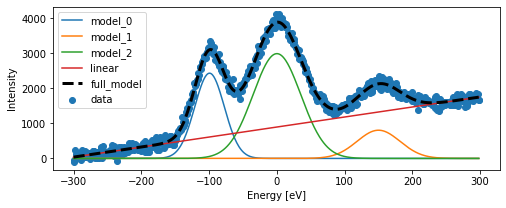

In [4]:
%matplotlib inline
from EMPeaks import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
#フィットするためのデータを生成します
gmm_data = GaussianMixture.GaussianMixtureModel(K=3, background="linear")
param = {
    "pi":[0.1, 0.05, 0.2, 0.4],
    "mu":[-100,150,0],
}
gmm_data.set_param(**param)
gmm_data.model[0].mu =-100
gmm_data.model[1].mu = 150
gmm_data.model[2].mu = 0

#データと初期パラメータのモデルをプロットします
x = np.arange(-300, 300)
N = 1.0e+6
y = N * (gmm_data.predict(x) + np.random.randn(len(x))*1e-4)
plt.plot(x,y)
gmm = GaussianMixture.GaussianMixtureModel(K=3, background="linear")
gmm.N_tot = sum(y)
gmm.plot(x,y)

#5回の初期パラメータサンプリングのあとに得られた最適なモデルをプロットします。
gmm.sampling(x,y,trial=5, r_eps=1e-8)
#lmm.fit(x, y, r_eps=1e-10)
gmm.plot(x,y)

## 3. Ramp_sum modelによるバックグラウンド処理
option "ramp_sum" はramp分布の重ね合わせで単調増加なバックグラウンド成分を近似します。ランプ分布は、立ち上がりが半三角分布である値を境に一応分布に変化する分布で、段差などに置かれているランプ形状に由来します。ランプ分布を一定間隔でずらしながら積み木のように積むことで、折れ線状にバックグラウンドを近似します。k_rampという変数でランプ分布の数を制御します。これは全エネルギー領域の分割数を表します。バックグラウンドはベースライン成分と端の処理が加わるため、全部でk_ramp+2の成分から構成されます。そのためランプ分布の数を増やして近似精度をあげると計算時間が増加します。

RampSum Background is set.
Parameter "pi" does not have relevant length. Then pi is uniformly set as default.
RampSum Background is set.


/Users/yasunobu/Documents/GitHub/EMPeaks/EMPeaks/GaussianMixture/_gmm2.py:96: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if sum(param["pi"]) is not 1.0:
/Users/yasunobu/Documents/GitHub/EMPeaks/EMPeaks/GaussianMixture/_gmm2.py:103: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if sum(param["pi"]) is not 1.0:
/Users/yasunobu/Documents/GitHub/EMPeaks/EMPeaks/GaussianMixture/_gmm2.py:181: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.background is 'linear':
/Users/yasunobu/Documents/GitHub/EMPeaks/EMPeaks/GaussianMixture/_gmm2.py:183: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.background is 'linear':
/Users/yasunobu/Documents/GitHub/EMPeaks/EMPeaks/GaussianMixture/_gmm2.py:221: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.background is "uniform":
/Users/yasunobu/Documents/GitHub/EMPeaks/EMPeaks/GaussianMixture/_gmm2.py:223: SyntaxWarning: "is" with a literal. Did you mean "=="?
  if self.backgrou

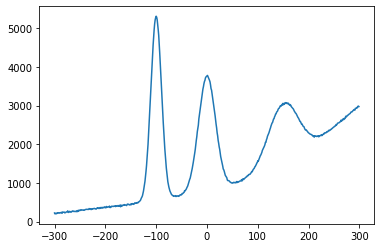

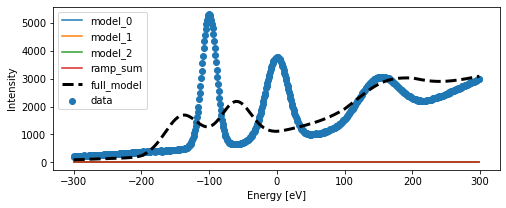

* Starting Trial #   0
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter. 226, elapsed time  0.86 s
   LogLikelihood:     -6.12472472e+06
        residual:      9.93894650e-09
<< Optimizing normalization factor by using least square method. >>
init 997251.0457106917
   non-linear least-square optimization is successfully finished.
            RMSE:      2.192519e+01
    Elapsed time:      3.896952e-03 s

* Starting Trial #   1
<< Start fitting via Adapted EM Algorithm. >>
>>> Convergence is not achieved within the iteration of 1000, elapsed time:  4.13 s
   LogLikelihood:      -6.13051781e+06
        residual:       9.05717443e-08
<< Optimizing normalization factor by using least square method. >>
init 997251.0457106917
   non-linear least-square optimization is successfully finished.
            RMSE:      2.556532e+02
    Elapsed time:      6.035089e-03 s

* Starting Trial #   2
<< Start fitting via Adapted EM Algorithm. >>
Convergence is achieved at iter.

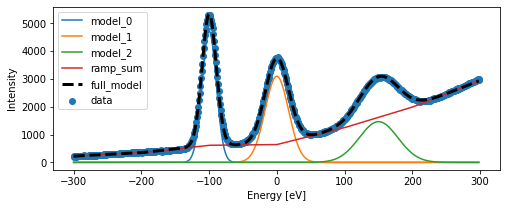

In [1]:
%matplotlib inline
from EMPeaks import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
#フィットするためのデータを生成します
gmm_data = GaussianMixture.GaussianMixtureModel(K=3, k_ramp=3, background="ramp_sum")
param = {
    "K":3,
    "pi":[0.1, 0.1, 0.1, 0.2, 0.01, 0.0, 0.01,0.01,0.2, 0.01],
    "mu":[-100,150,0],
}
gmm_data.set_param(**param)
gmm_data.model[0].mu =-100
gmm_data.model[1].mu = 150
gmm_data.model[2].mu = 0

#データと初期パラメータのモデルをプロットします
x = np.arange(-300, 300)
N = 1.0e+6
y = N * (gmm_data.predict(x) + np.random.randn(len(x))*1e-5)
plt.plot(x,y)
gmm = GaussianMixture.GaussianMixtureModel(K=3, k_ramp=5, background="ramp_sum")
gmm.N_tot = sum(y)
gmm.plot(x,y)

#5回の初期パラメータサンプリングのあとに得られた最適なモデルをプロットします。
gmm.sampling(x,y,trial=5, r_eps=1e-8)
#lmm.fit(x, y, r_eps=1e-10)
gmm.plot(x,y)